In [1]:
import logging
import os
from itertools import combinations
from pathlib import Path
from typing import List, Optional, Literal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import polars as pl
import seaborn as sns
from IPython.display import display


os.chdir("/root/py_projects/aihiii")

import src.utils.json_util as json_util
from src._StandardNames import StandardNames
from src.utils.custom_log import init_logger
from src.utils.set_rcparams import set_rcparams

set_rcparams()

LOG: logging.Logger = logging.getLogger(__name__)
STR: StandardNames = StandardNames()

init_logger(log_lvl=logging.INFO)
LOG.info("Working directory: %s", os.getcwd())

WIDTH: float = 448.13095 / 72

2024-12-20 21:23:01,711     INFO  MainProcess  MainThread Working directory: /root/py_projects/aihiii


In [2]:
FIG_DIR: Path = Path() / "reports" / "figures"
FIG_DIR /= "characterize_50th"
FIG_DIR.mkdir(parents=True, exist_ok=True)
LOG.info("Figures in %s, exist - %s", FIG_DIR, FIG_DIR.is_dir())

2024-12-20 21:23:01,719     INFO  MainProcess  MainThread Figures in reports/figures/characterize_50th, exist - True


In [3]:
DATA_DIR:Path = Path("experiments")
LOG.info("Data in %s, exist - %s", DATA_DIR, DATA_DIR.is_dir())

2024-12-20 21:23:01,728     INFO  MainProcess  MainThread Data in experiments, exist - True


In [8]:
PCA_DIRS: List[Path] = sorted(DATA_DIR.glob("2024-12-1*-*-*-*_pca_ann_*HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels"))
LOG.info("PCA dirs (n=%s):\n%s", len(PCA_DIRS), PCA_DIRS)

2024-12-20 21:25:06,933     INFO  MainProcess  MainThread PCA dirs (n=12):
[PosixPath('experiments/2024-12-13-08-09-38_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-13-10-14-08_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-13-13-24-27_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-13-15-34-09_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-13-19-12-10_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-14-00-28-47_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-14-05-28-25_pca_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-14-09-26-38_pca_ann_95HIII_injury_criteria_from_doe_s

In [9]:
def get_data() -> pd.DataFrame:
    results = []
    for res_dir in PCA_DIRS:
        LOG.info("Processing %s", res_dir)

        # get results
        results.append(pd.read_csv(res_dir / STR.fname_results_csv, index_col=[0,1]).loc[(-1, slice(None)), :].droplevel(STR.fold))

        # get para
        para = json_util.load(f_path=res_dir / STR.fname_para)
        results[-1][STR.perc] = para[STR.perc][STR.target][0]
        k = para[STR.pipeline]["pca_kernel"]
        results[-1]["Kernel"] = "None" if k is None else k
        results[-1]["N_COMPONENTS"] = para[STR.pipeline]["n_pca_components"]
        results[-1].set_index(["Kernel", "N_COMPONENTS", STR.perc], append=True, inplace=True)
        results[-1]["Median"] = results[-1].median(axis=1)

    results = pd.concat(results).sort_index()
    results.columns.name = "Injury_Criterion"

    return results

RESULTS:pd.DataFrame = get_data()
RESULTS

2024-12-20 21:25:09,738     INFO  MainProcess  MainThread Processing experiments/2024-12-13-08-09-38_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-20 21:25:09,749     INFO  MainProcess  MainThread Processing experiments/2024-12-13-10-14-08_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-20 21:25:09,760     INFO  MainProcess  MainThread Processing experiments/2024-12-13-13-24-27_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-20 21:25:09,766     INFO  MainProcess  MainThread Processing experiments/2024-12-13-15-34-09_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-20 21:25:09,773     INFO  MainProcess  MainThread Processing experiments/2024-12-13-19-12-10_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-20 21:25:09,780     INFO  MainProcess  MainThread Processing experiments/2024-12-14-00-28-47_pca_ann_05HIII_injury_cr

Injury_Criterion                Chest_Deflection  Chest_VC  Chest_a3ms  \
Data  Kernel N_COMPONENTS PERC                                           
Test  None   20           5             0.217547  0.327475    0.886932   
                          95            0.924424  0.921111    0.730647   
             40           5             0.191459  0.260820    0.886502   
                          95            0.920065  0.920176    0.727121   
      linear 20           5             0.217596  0.328432    0.887762   
                          95            0.924259  0.920658    0.731441   
             40           5             0.182698  0.256984    0.888055   
                          95            0.919827  0.920419    0.728199   
      rbf    20           5             0.201014  0.319427    0.885132   
                          95            0.912498  0.900381    0.725936   
             40           5             0.200052  0.289836    0.889061   
                          95            0.918353  0.914841    0.732424   
Train None   20           5             0.237658  0.356139    0.900519   
                          95            0.931350  0.931020    0.748870   
             40           5             0.305272  0.416664    0.908658   
                          95            0.943536  0.947178    0.769574   
      linear 20           5             0.238407  0.355016    0.899594   
                          95            0.931146  0.930366    0.747792   
             40           5             0.313847  0.410424    0.909612   
                          95            0.942508  0.945551    0.766621   
      rbf    20           5             0.220040  0.340094    0.891824   
                          95            0.919706  0.908219    0.735484   
             40           5             0.271196  0.387380    0.901770   
                          95            0.935002  0.934251    0.758727   

Injury_Criterion                Femur_Fz_Max_Compression  Head_HIC15  \
Data  Kernel N_COMPONENTS PERC                                         
Test  None   20           5                     0.651494    0.923797   
                          95                    0.921790    0.906704   
             40           5                     0.645151    0.925693   
                          95                    0.912258    0.901744   
      linear 20           5                     0.652218    0.923543   
                          95                    0.920968    0.907287   
             40           5                     0.644704    0.925552   
                          95                    0.913571    0.903215   
      rbf    20           5                     0.652746    0.912436   
                          95                    0.915735    0.911972   
             40           5                     0.646423    0.916120   
                          95                    0.915709    0.913131   
Train None   20           5                     0.661270    0.929074   
                          95                    0.930577    0.930965   
             40           5                     0.671263    0.937781   
                          95                    0.942767    0.953973   
      linear 20           5                     0.662321    0.930054   
                          95                    0.930161    0.930829   
             40           5                     0.671155    0.939141   
                          95                    0.940298    0.953285   
      rbf    20           5                     0.659016    0.918155   
                          95                    0.923317    0.921992   
             40           5                     0.667524    0.927860   
                          95                    0.934636    0.937249   

Injury_Criterion                Head_a3ms  Neck_Fx_Shear_Max  \
Data  Kernel N_COMPONENTS PERC                                 
Test  None   20           5      0.832353           0.749685   
          

In [10]:
RESULTS_L:pd.DataFrame = pd.DataFrame({"R2":RESULTS.stack()}).reset_index()
RESULTS_L

,Data,Kernel,N_COMPONENTS,PERC,Injury_Criterion,R2
0,Test,None,20,5,Chest_Deflection,0.217547
1,Test,None,20,5,Chest_VC,0.327475
2,Test,None,20,5,Chest_a3ms,0.886932
3,Test,None,20,5,Femur_Fz_Max_Compression,0.651494
4,Test,None,20,5,Head_HIC15,0.923797
...,...,...,...,...,...,...
235,Train,rbf,40,95,Head_a3ms,0.932581
236,Train,rbf,40,95,Neck_Fx_Shear_Max,0.932240
237,Train,rbf,40,95,Neck_Fz_Max_Tension,0.890375
238,Train,rbf,40,95,Neck_My_Extension,0.926837


In [11]:
RESULTS.loc[(*[slice(None)]*3, 5), :].droplevel(STR.perc)

Injury_Criterion           Chest_Deflection  Chest_VC  Chest_a3ms  \
Data  Kernel N_COMPONENTS                                           
Test  None   20                    0.217547  0.327475    0.886932   
             40                    0.191459  0.260820    0.886502   
      linear 20                    0.217596  0.328432    0.887762   
             40                    0.182698  0.256984    0.888055   
      rbf    20                    0.201014  0.319427    0.885132   
             40                    0.200052  0.289836    0.889061   
Train None   20                    0.237658  0.356139    0.900519   
             40                    0.305272  0.416664    0.908658   
      linear 20                    0.238407  0.355016    0.899594   
             40                    0.313847  0.410424    0.909612   
      rbf    20                    0.220040  0.340094    0.891824   
             40                    0.271196  0.387380    0.901770   

Injury_Criterion           Femur_Fz_Max_Compression  Head_HIC15  Head_a3ms  \
Data  Kernel N_COMPONENTS                                                    
Test  None   20                            0.651494    0.923797   0.832353   
             40                            0.645151    0.925693   0.834995   
      linear 20                            0.652218    0.923543   0.831325   
             40                            0.644704    0.925552   0.836908   
      rbf    20                            0.652746    0.912436   0.818620   
             40                            0.646423    0.916120   0.824559   
Train None   20                            0.661270    0.929074   0.842795   
             40                            0.671263    0.937781   0.858254   
      linear 20                            0.662321    0.930054   0.843570   
             40                            0.671155    0.939141   0.861277   
      rbf    20                            0.659016    0.918155   0.826484   
             40                            0.667524    0.927860   0.845882   

Injury_Criterion           Neck_Fx_Shear_Max  Neck_Fz_Max_Tension  \
Data  Kernel N_COMPONENTS                                           
Test  None   20                     0.749685             0.674891   
             40                     0.763827             0.687217   
      linear 20                     0.750802             0.674708   
             40                     0.764505             0.686267   
      rbf    20                     0.702754             0.648606   
             40                     0.735301             0.666579   
Train None   20                     0.773725             0.695503   
             40                     0.814616             0.721465   
      linear 20                     0.778079             0.697290   
             40                     0.810494             0.722730   
      rbf    20                     0.715622             0.665609   
             40                     0.775600             0.697608   

Injury_Criterion           Neck_My_Extension    Median  
Data  Kernel N_COMPONENTS                               
Test  None   20                     0.531457  0.674891  
             40                     0.511121  0.687217  
      linear 20                     0.532943  0.674708  
             40                     0.511292  0.686267  
      rbf    20                     0.537588  0.652746  
             40                     0.529174  0.666579  
Train None   20                     0.583806  0.695503  
             40                     0.619141  0.721465  
      linear 20                     0.581593  0.697290  
             40                     0.616541  0.722730  
      rbf    20                     0.562303  0.665609  
             40                     0.600063  0.697608

In [12]:
RESULTS.loc[("Test", *[slice(None)]*2, 95), :].droplevel(STR.perc)

Injury_Criterion          Chest_Deflection  Chest_VC  Chest_a3ms  \
Data Kernel N_COMPONENTS                                           
Test None   20                    0.924424  0.921111    0.730647   
            40                    0.920065  0.920176    0.727121   
     linear 20                    0.924259  0.920658    0.731441   
            40                    0.919827  0.920419    0.728199   
     rbf    20                    0.912498  0.900381    0.725936   
            40                    0.918353  0.914841    0.732424   

Injury_Criterion          Femur_Fz_Max_Compression  Head_HIC15  Head_a3ms  \
Data Kernel N_COMPONENTS                                                    
Test None   20                            0.921790    0.906704   0.911490   
            40                            0.912258    0.901744   0.915960   
     linear 20                            0.920968    0.907287   0.911947   
            40                            0.913571    0.903215   0.916233   
     rbf    20                            0.915735    0.911972   0.908736   
            40                            0.915709    0.913131   0.916701   

Injury_Criterion          Neck_Fx_Shear_Max  Neck_Fz_Max_Tension  \
Data Kernel N_COMPONENTS                                           
Test None   20                     0.915690             0.879395   
            40                     0.900421             0.879905   
     linear 20                     0.915915             0.878070   
            40                     0.903872             0.881222   
     rbf    20                     0.909315             0.863825   
            40                     0.907770             0.873051   

Injury_Criterion          Neck_My_Extension    Median  
Data Kernel N_COMPONENTS                               
Test None   20                     0.904205  0.911490  
            40                     0.903897  0.903897  
     linear 20                     0.904357  0.911947  
            40                     0.901591  0.903872  
     rbf    20                     0.903023  0.908736  
            40                     0.909409  0.913131

5 0.6872171849215984


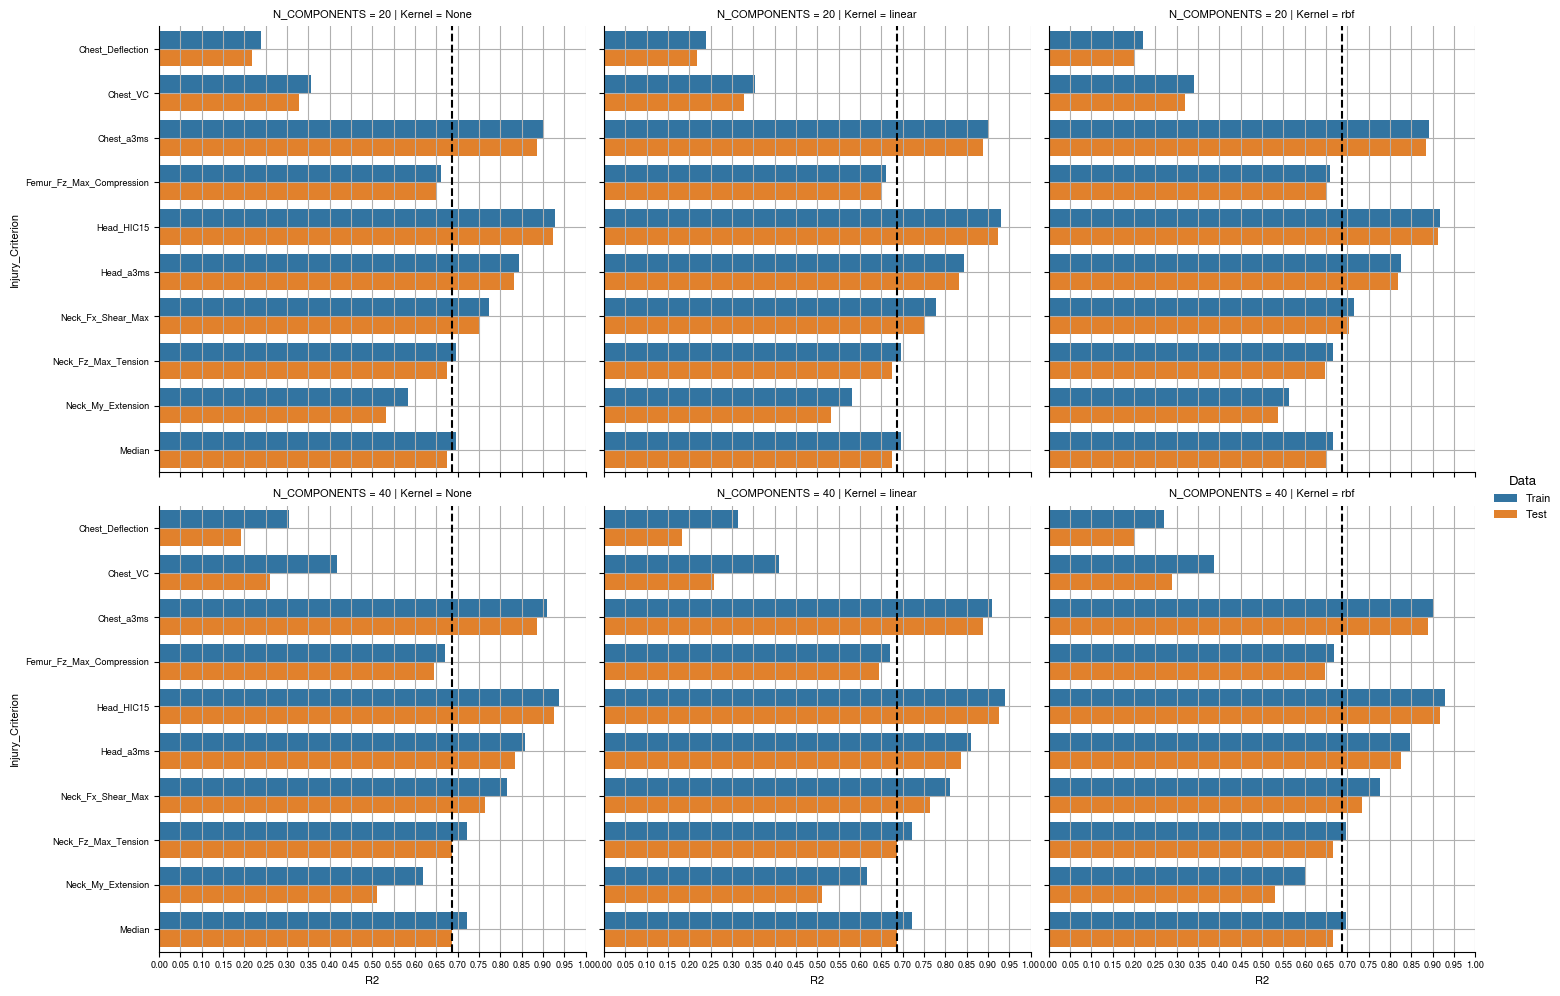

In [13]:
def plot(perc: int):
    g=sns.catplot(
        data=RESULTS_L[RESULTS_L[STR.perc].eq(perc)],
        y="Injury_Criterion",
        x="R2",
        hue="Data",
        col="Kernel",
        row="N_COMPONENTS",
        kind="bar",
        hue_order=["Train", "Test"],
        orient="h",
    )
    for ax in g.axes.flat:
        ax.grid()
        ax.set_xlim(0, 1)
        ax.set_xticks(np.linspace(0, 1, 21))
        ax.axvline(RESULTS.loc[("Test", *[slice(None)]*2, perc), "Median"].max(), c="black", ls="--")
    print(perc, RESULTS.loc[("Test", *[slice(None)]*2, perc), "Median"].max())

plot(perc=5)

95 0.9131308973990876


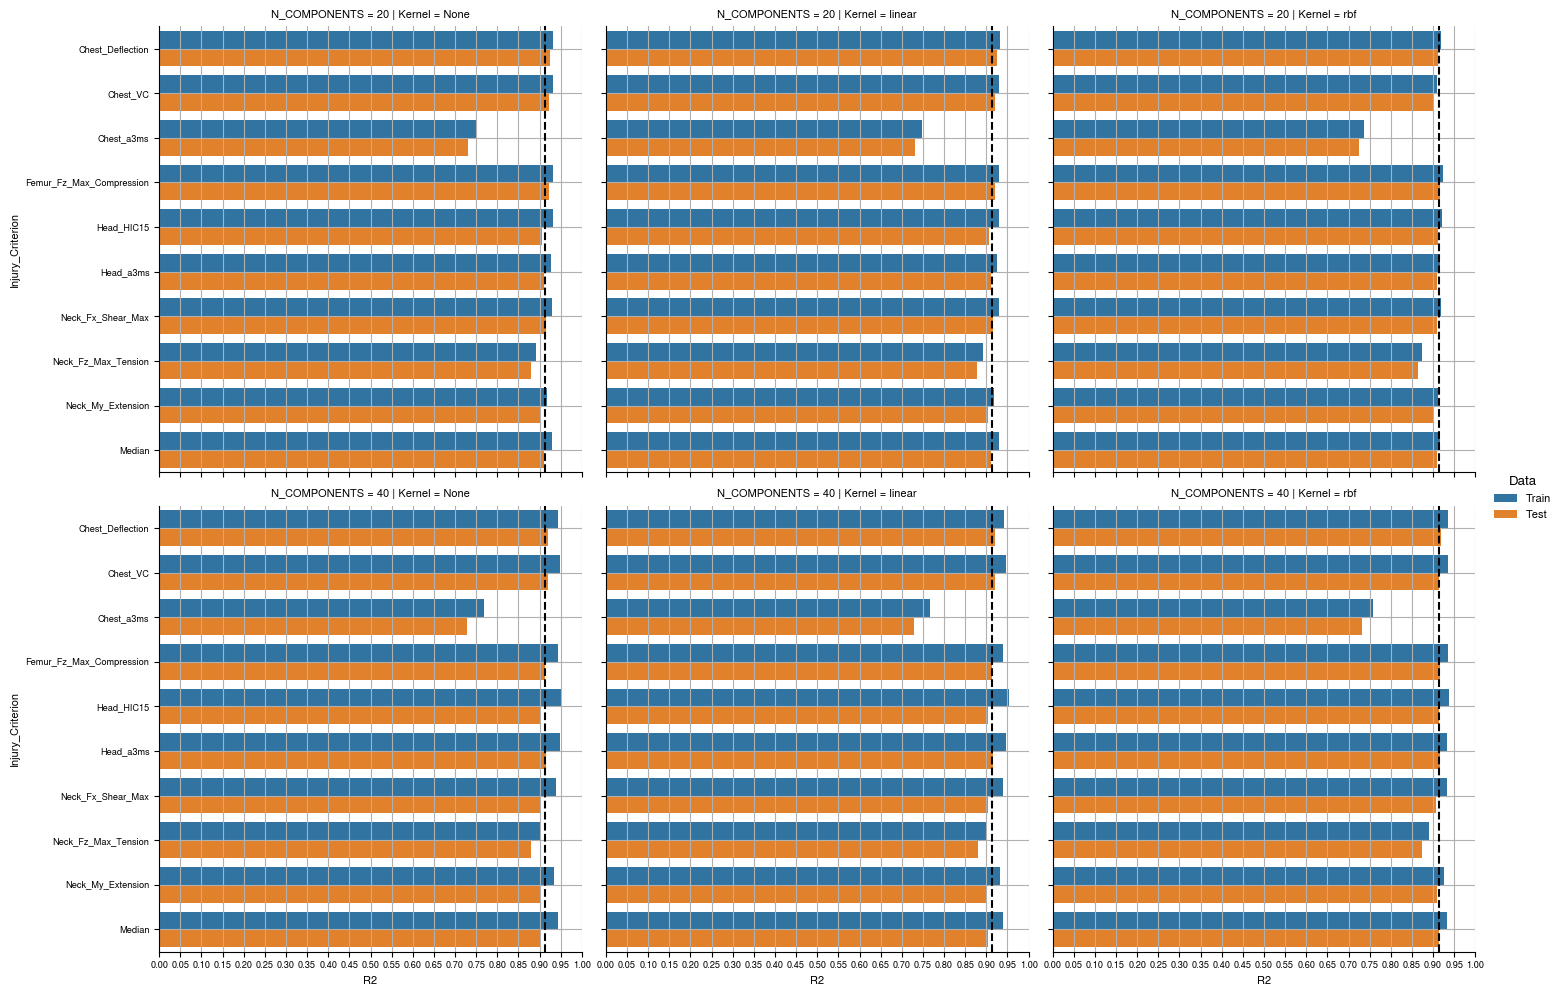

In [14]:
plot(perc=95)

2024-12-20 21:53:10,547     INFO  MainProcess  MainThread maxp pruned
2024-12-20 21:53:10,551     INFO  MainProcess  MainThread cmap pruned
2024-12-20 21:53:10,551     INFO  MainProcess  MainThread post pruned
2024-12-20 21:53:10,553     INFO  MainProcess  MainThread CFF  pruned
2024-12-20 21:53:10,554     INFO  MainProcess  MainThread GPOS pruned
2024-12-20 21:53:10,560     INFO  MainProcess  MainThread GSUB pruned
2024-12-20 21:53:10,562     INFO  MainProcess  MainThread Added .notdef to subset
2024-12-20 21:53:10,562     INFO  MainProcess  MainThread Closing glyph list over 'GSUB': 43 glyphs before
2024-12-20 21:53:10,563     INFO  MainProcess  MainThread Glyph names: ['.notdef', 'F', 'H', 'I', 'K', 'M', 'N', 'R', 'T', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'underscore', 'w', 'zero']
2024-12-20 21:53:10,563     INFO  MainPro

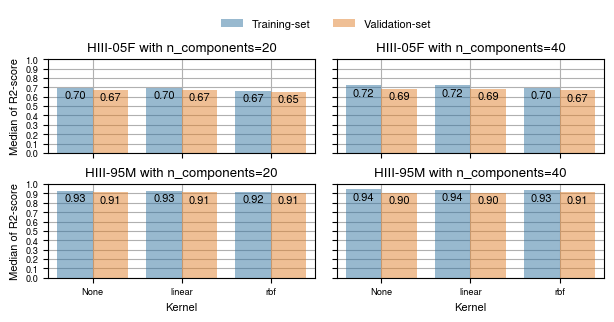

In [58]:
def plot2():
    fig, ax = plt.subplot_mosaic(
        mosaic=[["L", "L"], ["5_20", "5_40"], ["95_20", "95_40"]],
        layout="constrained",
        height_ratios=[0.1, 1, 1],
        sharex=True,
        sharey=True,
    )
    db = pd.DataFrame({"R2": RESULTS["Median"]}).reset_index().replace({"Train": "Training-set", "Test": "Validation-set"})
    for perc in [5, 95]:
        for n_comp in [20, 40]:
            sns.barplot(
                data=db[db[STR.perc].eq(perc) & db["N_COMPONENTS"].eq(n_comp)],
                x="Kernel",
                y="R2",
                hue="Data",                
                ax=ax[f"{perc}_{n_comp}"],
                alpha=0.5,
                hue_order=["Training-set", "Validation-set"],
            )
            ax[f"{perc}_{n_comp}"].bar_label(ax[f"{perc}_{n_comp}"].containers[0], fmt="%.2f", padding=-9)
            ax[f"{perc}_{n_comp}"].bar_label(ax[f"{perc}_{n_comp}"].containers[1], fmt="%.2f", padding=-9)

            ax[f"{perc}_{n_comp}"].grid()
            ax[f"{perc}_{n_comp}"].set_ylabel("Median of R2-score")
            ax[f"{perc}_{n_comp}"].set_ylim(0, 1)
            ax[f"{perc}_{n_comp}"].set_yticks(np.linspace(0, 1, 11))
            ax[f"{perc}_{n_comp}"].set_axisbelow(True)
            ax[f"{perc}_{n_comp}"].set_title(f"HIII-{perc:02d}{'F' if perc==5 else 'M'} with n_components={n_comp}")
            ax["L"].legend(*ax[f"{perc}_{n_comp}"].get_legend_handles_labels(), ncols=2, loc="upper center")
            ax[f"{perc}_{n_comp}"].legend().remove()
    ax["L"].axis("off")

    fig.set_figwidth(WIDTH - 0.2)
    fig.set_figheight(0.5 * WIDTH)
    fig.savefig(FIG_DIR / "pca_results.pdf")


plot2()

In [26]:
pd.DataFrame({"R2":RESULTS["Median"]}).reset_index()

,Data,Kernel,N_COMPONENTS,PERC,R2
0,Test,None,20,5,0.674891
1,Test,None,20,95,0.911490
2,Test,None,40,5,0.687217
3,Test,None,40,95,0.903897
4,Test,linear,20,5,0.674708
5,Test,linear,20,95,0.911947
6,Test,linear,40,5,0.686267
7,Test,linear,40,95,0.903872
8,Test,rbf,20,5,0.652746
9,Test,rbf,20,95,0.908736


In [16]:
import pickle
from sklearn.decomposition import PCA
with open("experiments/2024-11-08-15-50-55_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels/feature_extractor.pkl", "rb") as f:
    fe:PCA = pickle.load(f)

print(len(fe.explained_variance_ratio_), np.sum(fe.explained_variance_ratio_))

40 0.9781764467714535


In [17]:
with open("experiments/2024-11-08-22-14-27_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels/feature_extractor.pkl", "rb") as f:
    fe:PCA = pickle.load(f)

print(len(fe.explained_variance_ratio_), np.sum(fe.explained_variance_ratio_))

20 0.9478916276390724


In [18]:
with open("experiments/2024-11-08-15-50-55_pca_ann_05HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels/feature_extractor.pkl", "rb") as f:
    fe:PCA = pickle.load(f)

print(len(fe.explained_variance_ratio_), np.sum(fe.explained_variance_ratio_))

40 0.9781764467714535


In [19]:
len([
      "03CHST0000OCCUACXD",
      "03CHST0000OCCUACYD",
      "03CHST0000OCCUACZD",
      "03CHST0000OCCUDSXD",
      "03CHSTLOC0OCCUDSXD",
      "03CHSTLOC0OCCUDSYD",
      "03CHSTLOC0OCCUDSZD",
      "03FEMRLE00OCCUFOZD",
      "03FEMRRI00OCCUFOZD",
      "03HEAD0000OCCUACXD",
      "03HEAD0000OCCUACYD",
      "03HEAD0000OCCUACZD",
      "03HEADLOC0OCCUDSXD",
      "03HEADLOC0OCCUDSYD",
      "03HEADLOC0OCCUDSZD",
      "03NECKUP00OCCUFOXD",
      "03NECKUP00OCCUFOYD",
      "03NECKUP00OCCUFOZD",
      "03NECKUP00OCCUMOYD",
      "03PELV0000OCCUACXD",
      "03PELV0000OCCUACYD",
      "03PELV0000OCCUACZD",
      "03PELVLOC0OCCUDSXD",
      "03PELVLOC0OCCUDSYD",
      "03PELVLOC0OCCUDSZD"
    ])

25